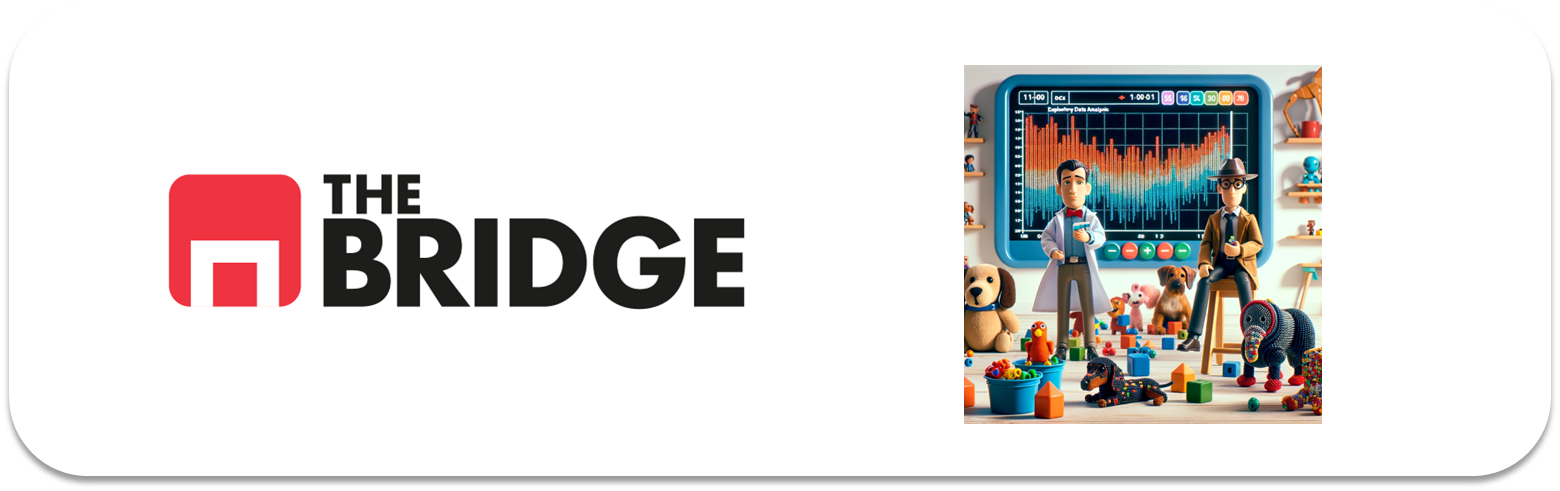

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [3]:
df_titanic= pd.read_csv("./data/titanic.csv")

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [4]:
df_titanic.drop(columns=["deck", "survived", "pclass", "embarked"], inplace=True)

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [5]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]
df_titanic.drop(columns=["parch", "sibsp"], inplace=True)

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [6]:
df_titanic["embark_town"] = df_titanic["embark_town"].fillna(df_titanic["embark_town"].mode()[0])

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [7]:
df_titanic['age'] = df_titanic['age'].fillna(df_titanic['age'].mean())

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

In [ ]:
df_titanic[df_titanic["alive"] == "yes"]["who"].value_counts()

who
woman    205
man       88
child     49
Name: count, dtype: int64

In [10]:
df_titanic.groupby("who")["alive"].value_counts(normalize=True).unstack()

alive,no,yes
who,,
child,0.409639,0.590361
man,0.836127,0.163873
woman,0.243542,0.756458


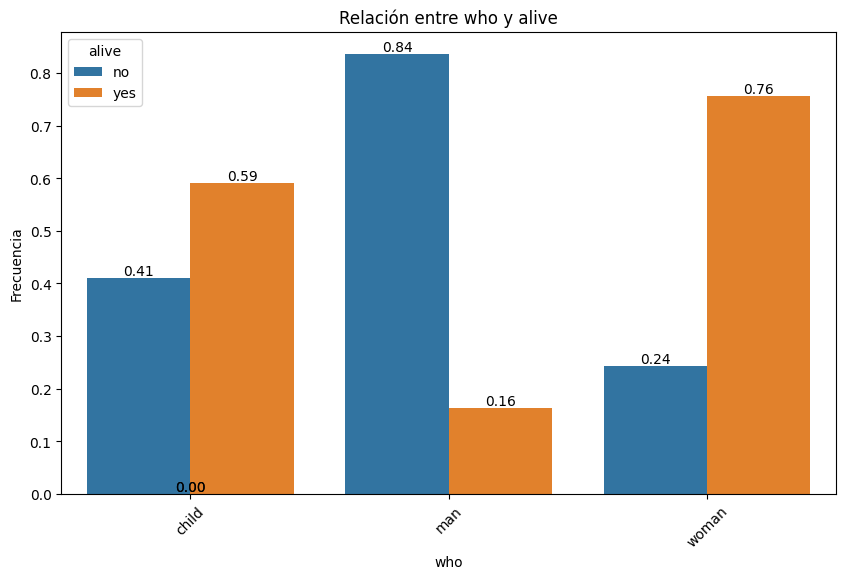

In [17]:
plot_categorical_relationship_fin(df_titanic, "who", "alive", relative_freq=True, show_values=True)

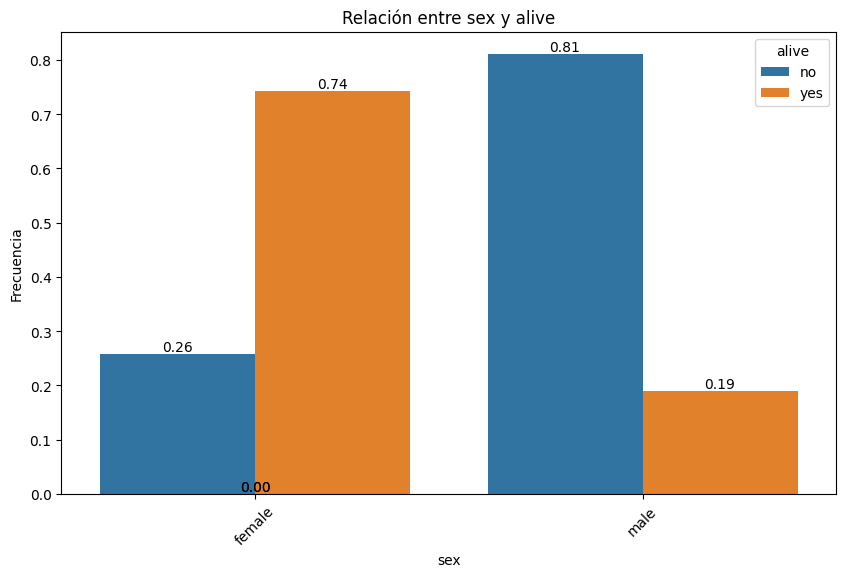

In [18]:
plot_categorical_relationship_fin(df_titanic, "sex", "alive", relative_freq=True, show_values=True)

In [11]:
tabla_contingencia = pd.crosstab(df_titanic['sex'], df_titanic['alive'])
tabla_contingencia

#2 aplicar
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 260.71702016732104
P-Value: 1.1973570627755645e-58
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


In [ ]:
tabla_contingencia = pd.crosstab(df_titanic['who'], df_titanic['alive'])
tabla_contingencia


from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414  31.85858586]
 [330.87878788 206.12121212]
 [166.97979798 104.02020202]]


* Absolutamente sobrevivieron más mujeres.
* Relativamente, la supervivencia es más alta en niños y mujeres que en hombres.
* Ambos tests dan p < 0.05, indicando una relación estadísticamente significativa.

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

In [ ]:
df_titanic[df_titanic["alive"] == "yes"]["class"].value_counts()  #First class

class
First     136
Third     119
Second     87
Name: count, dtype: int64

In [ ]:
df_titanic.groupby("class")["alive"].value_counts(normalize=True).unstack() #First class

alive,no,yes
class,,
First,0.370370,0.629630
Second,0.527174,0.472826
Third,0.757637,0.242363


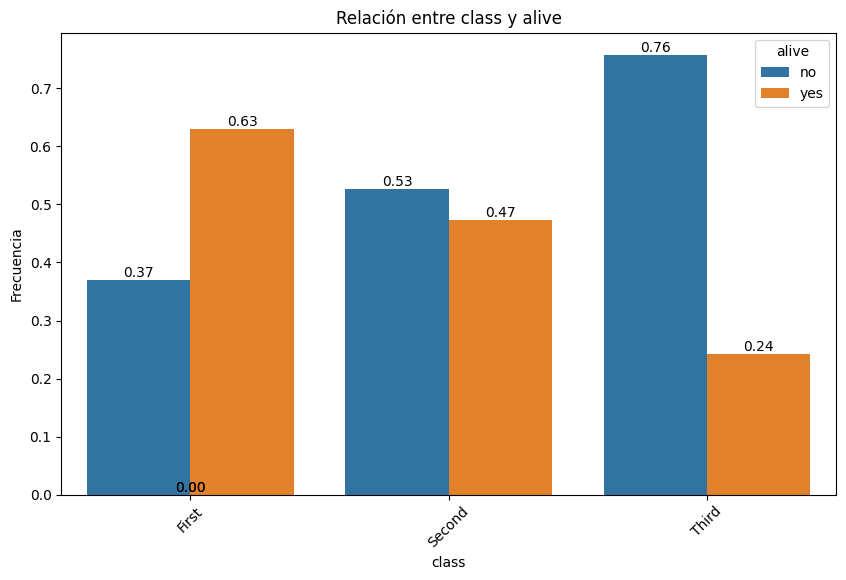

In [20]:
plot_categorical_relationship_fin(df_titanic, "class", "alive", relative_freq=True, show_values=True)

In [ ]:
tabla_contingencia = pd.crosstab(df_titanic['class'], df_titanic['alive'])
tabla_contingencia


from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


* Proporción más alta en 1ª clase, tanto en términos absolutos como relativos
* Relación significativa entre clase y supervivencia (p < 0.05).

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

In [22]:
df_titanic[df_titanic["alive"] == "yes"]["embark_town"].value_counts()

embark_town
Southampton    219
Cherbourg       93
Queenstown      30
Name: count, dtype: int64

In [23]:
df_titanic.groupby("embark_town")["alive"].value_counts(normalize=True).unstack()

alive,no,yes
embark_town,,
Cherbourg,0.446429,0.553571
Queenstown,0.610390,0.389610
Southampton,0.660991,0.339009


In [24]:
tabla_contingencia = pd.crosstab(df_titanic['embark_town'], df_titanic['alive'])
tabla_contingencia


from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]


* Southampton es la ciudad con más supervivientes absolutos, pero también la de más pasajeros en total.
* Cherbourg es la que tiene mejor proporción de supervivencia.
* El valor de p indica que sí hay una relación estadística significativa.

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

<Axes: xlabel='alive', ylabel='fare'>

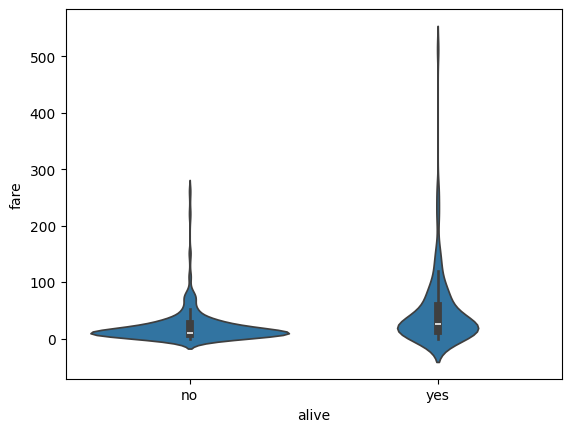

In [25]:
sns.violinplot(x="alive", y="fare", data=df_titanic)

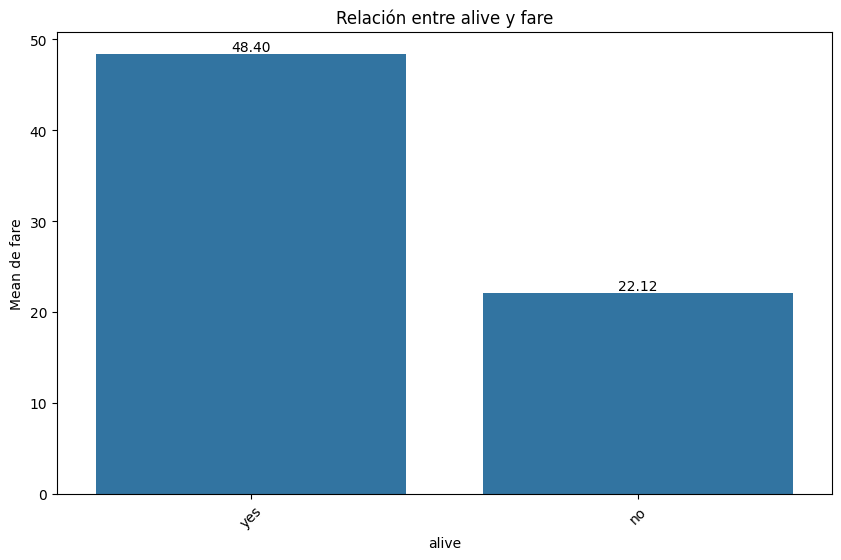

In [27]:
plot_categorical_numerical_relationship(df_titanic,categorical_col="alive", numerical_col="fare", show_values=True)

In [28]:
from scipy.stats import mannwhitneyu

grupo_vivos = df_titanic[df_titanic["alive"] == "yes"]["fare"]
grupo_muertos = df_titanic[df_titanic["alive"] == "no"]["fare"]
u_stat, p_valor = mannwhitneyu(grupo_vivos, grupo_muertos)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)


Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


* Pasajeros que sobrevivieron pagaron más en promedio.
* Relación significativa entre el precio del billete y la supervivencia.

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?



In [ ]:
df_titanic[df_titanic["fare"] == 0] #Probablemente tripulación o familia 

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0
277,male,29.699118,0.0,Second,man,True,Southampton,no,True,0
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0
413,male,29.699118,0.0,Second,man,True,Southampton,no,True,0
466,male,29.699118,0.0,Second,man,True,Southampton,no,True,0
481,male,29.699118,0.0,Second,man,True,Southampton,no,True,0
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0
633,male,29.699118,0.0,First,man,True,Southampton,no,True,0


In [ ]:
df_titanic.loc[df_titanic["fare"].idxmax()] #una mujer y sobrevivió

sex                  female
age                    35.0
fare               512.3292
class                 First
who                   woman
adult_male            False
embark_town       Cherbourg
alive                   yes
alone                  True
family_members            0
Name: 258, dtype: object

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

In [ ]:
df_titanic.groupby("alive")["fare"].describe()

,count,mean,std,min,25%,50%,75%,max
alive,,,,,,,,
no,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
yes,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


In [35]:
df_titanic.groupby("alive")["embark_town"].value_counts(normalize = True)

alive  embark_town
no     Southampton    0.777778
       Cherbourg      0.136612
       Queenstown     0.085610
yes    Southampton    0.640351
       Cherbourg      0.271930
       Queenstown     0.087719
Name: proportion, dtype: float64

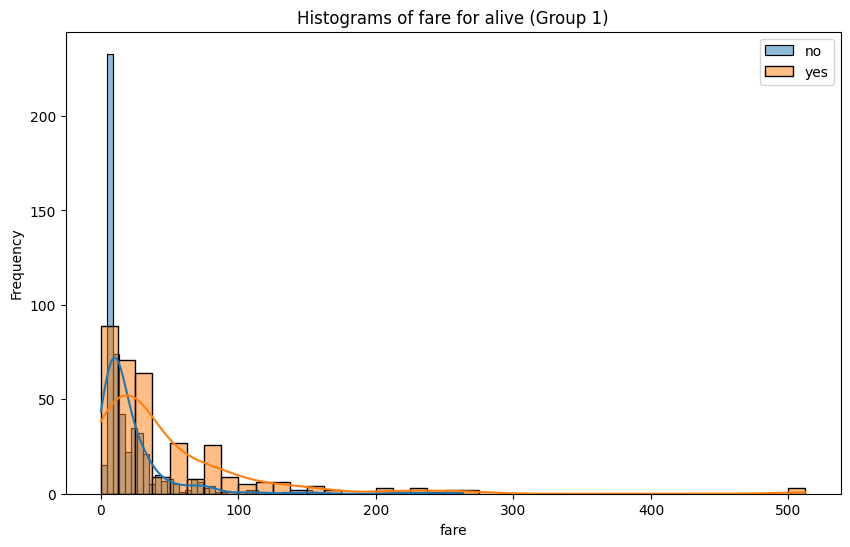

In [40]:
plot_grouped_histograms(df_titanic, cat_col="alive",num_col="fare", group_size= 2)

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?


In [55]:
df_titanic["age_group"] = np.where(df_titanic["who"] == "child", "child", "adult")

pd.crosstab([df_titanic["class"], df_titanic["age_group"]], df_titanic["alive"])

alive              no  yes
class  age_group          
First  adult       79  131
       child        1    5
Second adult       97   68
       child        0   19
Third  adult      339   94
       child       33   25

In [56]:
pd.crosstab([df_titanic["class"], df_titanic["age_group"]], df_titanic["alive"], normalize=True) *100

alive                    no        yes
class  age_group                      
First  adult       8.866442  14.702581
       child       0.112233   0.561167
Second adult      10.886644   7.631874
       child       0.000000   2.132435
Third  adult      38.047138  10.549944
       child       3.703704   2.805836

In [ ]:
#Los adultos de primera clase fueron los de mayor supervivencia

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

Respuesta no:


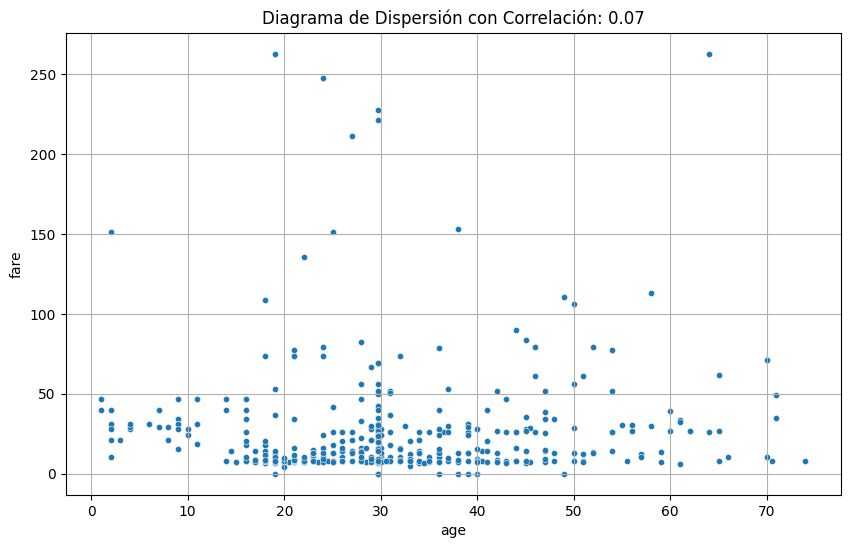

Respuesta yes:


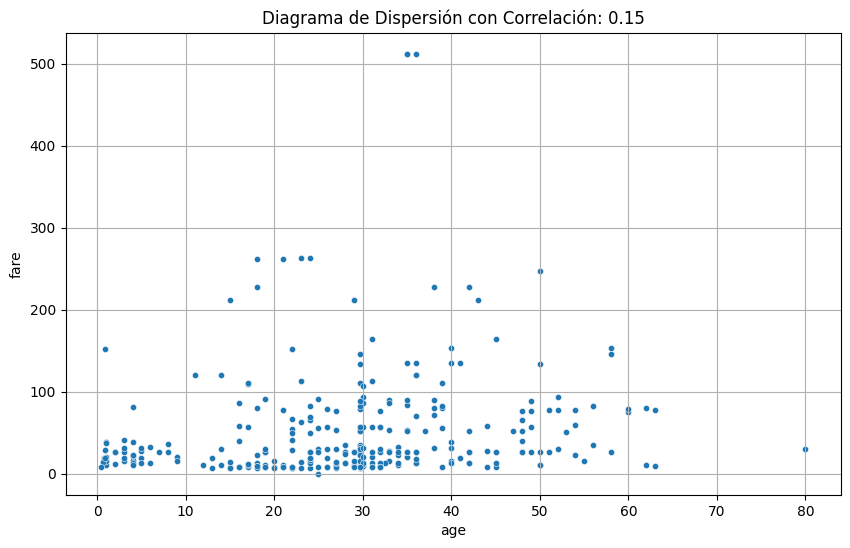

In [46]:
col_directora = "alive"
col_1 = "fare"
col_2 = "age"
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]]

for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

<Axes: xlabel='age', ylabel='fare'>

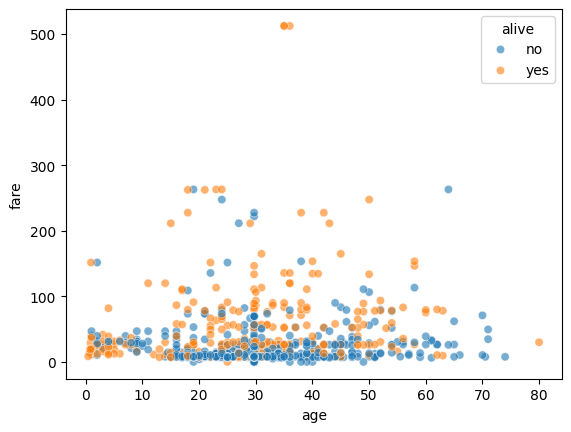

In [47]:
sns.scatterplot(data=df_titanic, x="age", y="fare", hue="alive", alpha=0.6)

* No hay una tendencia lineal clara, pero los supervivientes tienden a estar en el rango de edad medio-bajo y con los billetes más caros

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [58]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun.csv")
df_air_jun["aircompany"].value_counts()

aircompany
TabarAir      142
MoldaviAir    133
PamPangea     117
FlyQ          108
Airnar        100
Name: count, dtype: int64

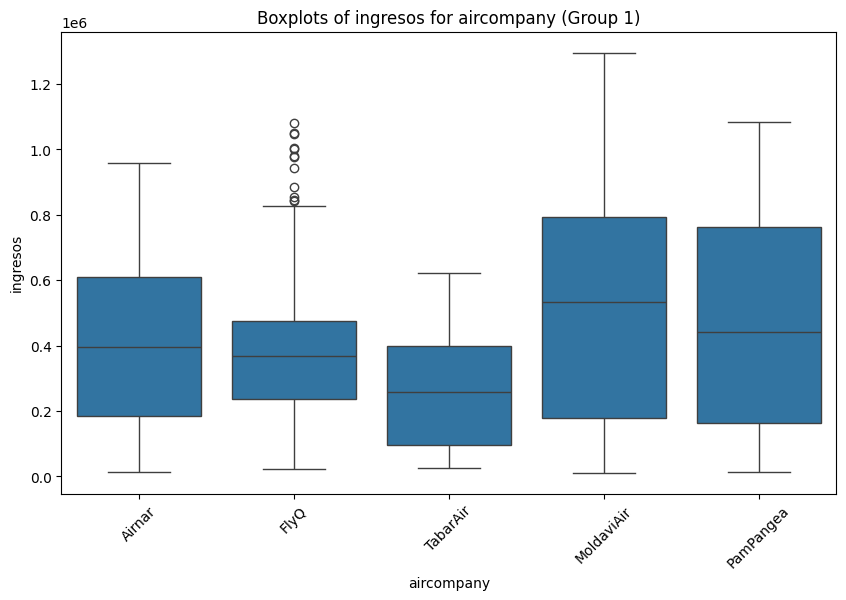

In [59]:
plot_grouped_boxplots(df_air_jun,"aircompany","ingresos")

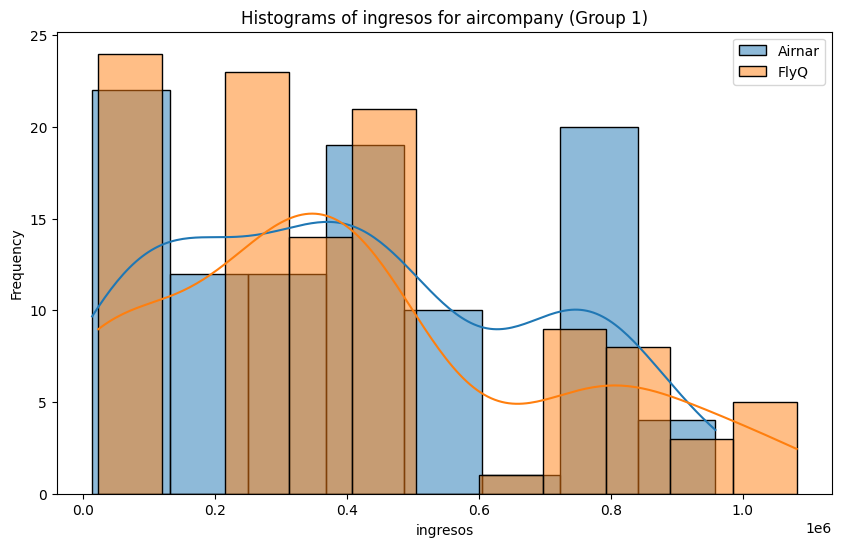

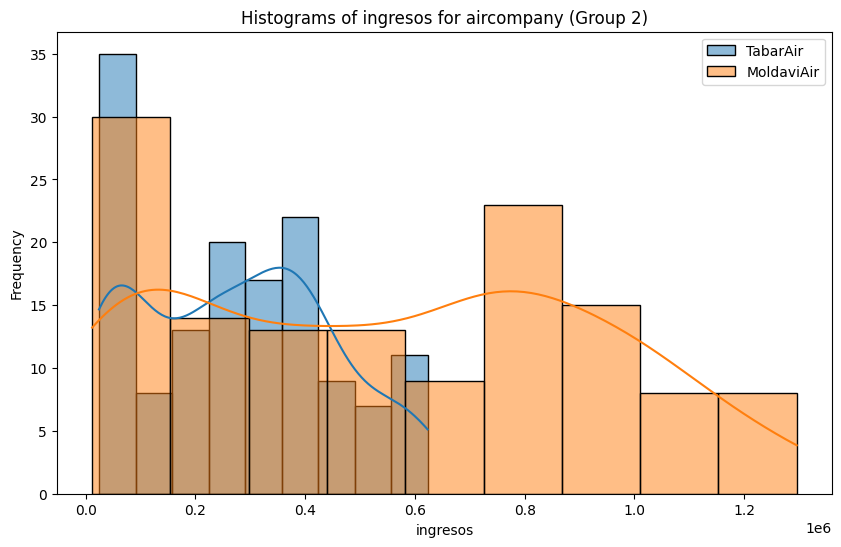

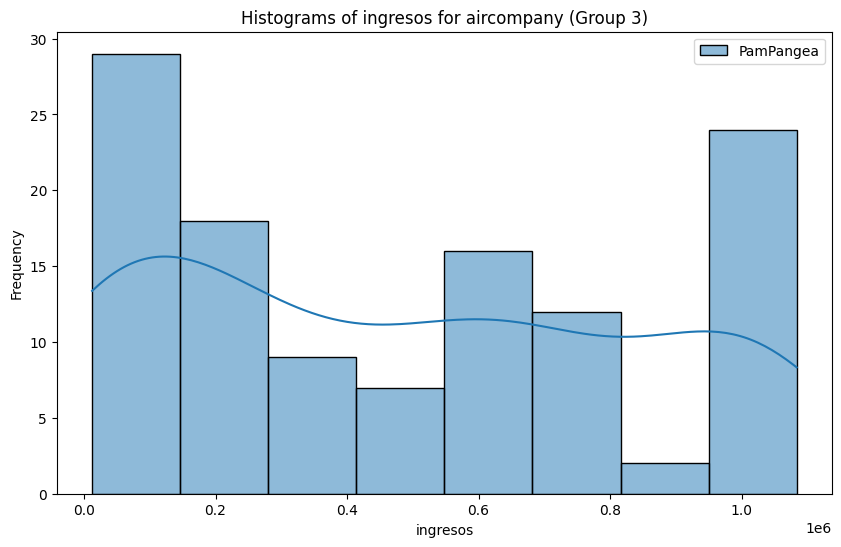

In [60]:
plot_grouped_histograms(df_air_jun,"aircompany", "ingresos", 2)

TabarAir es una de las compañías con los ingresos medianos más bajos
Esto se puede deber a:
* Que ofrece vuelos de bajo coste (low cost).
* Que tiene muchas rutas pero de corta distancia o con tarifas muy económicas.
* Que no está monetizando eficientemente sus vuelos en comparación con otras compañías.

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


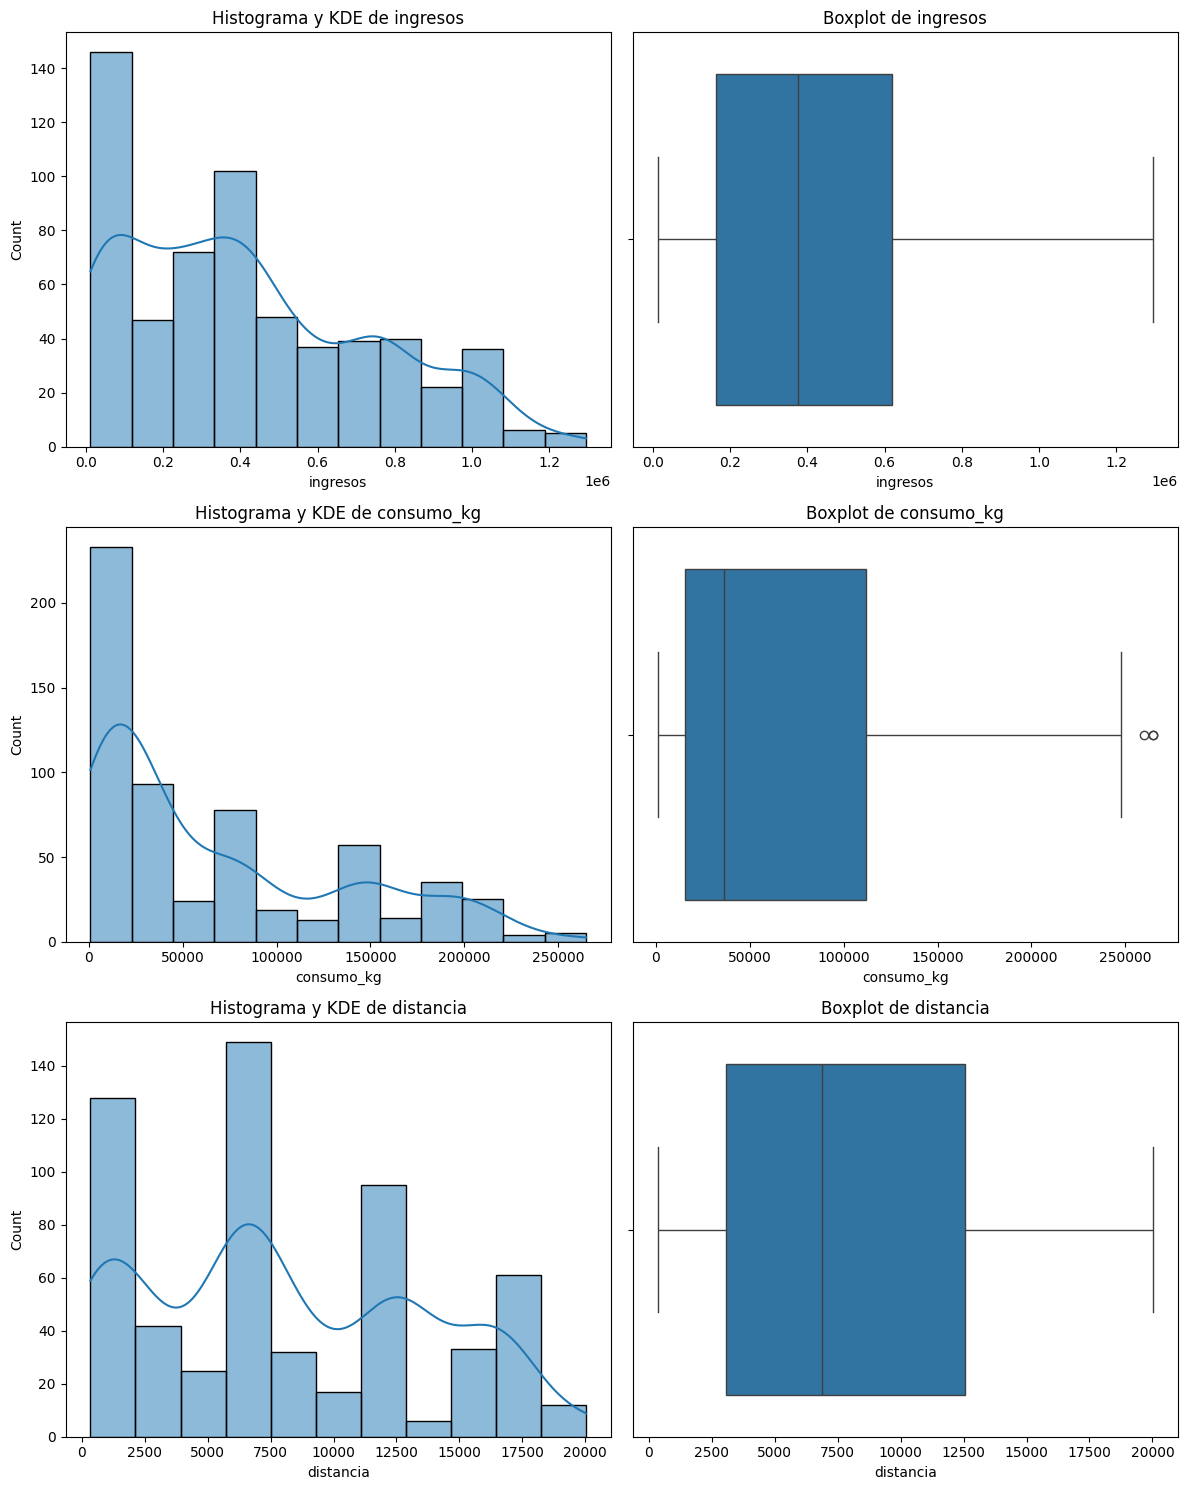

In [61]:
plot_combined_graphs(df_air_jun,["ingresos","consumo_kg","distancia"])

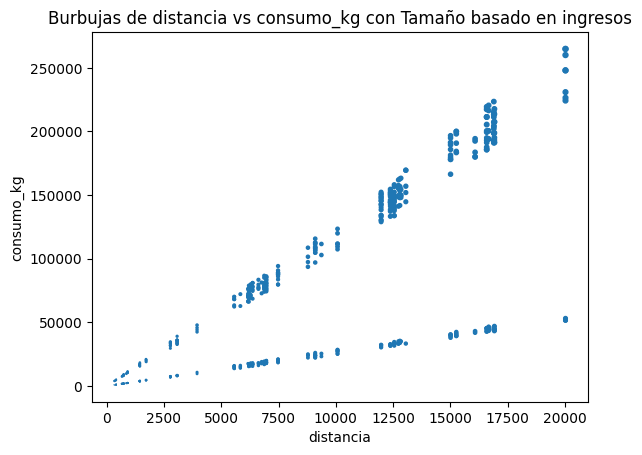

In [64]:
bubble_plot(df_air_jun,"distancia","consumo_kg","ingresos", scale = 100000)

Las burbujas más grandes (mayores ingresos) tienden a concentrarse en las zonas donde la distancia es media-alta y el consumo también elevado.
Hay vuelos más eficientes que otros. Esto se puede deber a que algunos aviones son más eficientes energéticamente. O la aerolínea podría estar usando modelos más modernos o con mejor aerodinámica.

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [65]:
df_air_jun["distancia"].describe()

count      600.000000
mean      8071.003333
std       5550.244086
min        344.000000
25%       3073.000000
50%       6877.000000
75%      12553.000000
max      20029.000000
Name: distancia, dtype: float64

In [66]:
bins = [0, 3000, 7000, 13000, float('inf')]
labels = ['corto', 'medio', 'largo', 'muy_largo']

df_air_jun["cat_vuelo"] = pd.cut(df_air_jun["distancia"], bins=bins, labels=labels)

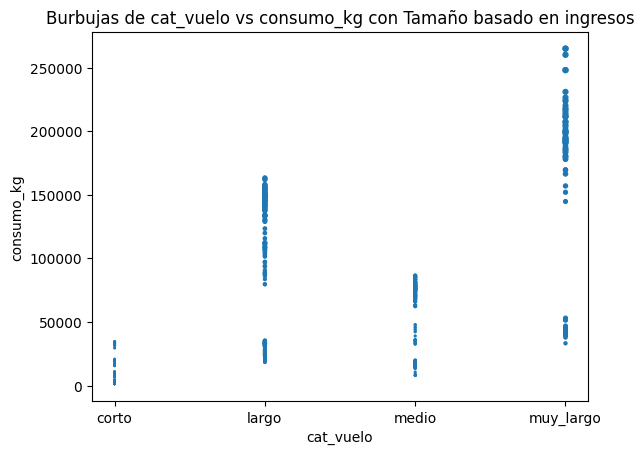

In [70]:
bubble_plot(df_air_jun, "cat_vuelo", "consumo_kg", "ingresos", scale=100000)

Con este gráfico se puede comparar cómo diferentes grupos de vuelos tienen un impacto diferente.

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.